In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stats
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from itertools import combinations
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("app_test.csv")

In [3]:
data

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,38250,144293,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,...,-12866,-3154,-1251.0,-4395,TUESDAY,10,Government,0.570305,0.399628,0.586740
14757,148422,272093,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,...,-11421,-3962,-5247.0,-3795,SATURDAY,7,Self-employed,NaN,0.610758,0.368969
14758,130286,251117,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,...,-13313,-2258,-3899.0,-4515,MONDAY,12,Other,NaN,0.639824,0.782608
14759,202131,334313,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,...,-24085,365243,-9354.0,-4740,THURSDAY,15,NA1,NaN,0.642139,0.584990


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         14761 non-null  int64  
 1   LN_ID              14761 non-null  int64  
 2   TARGET             14761 non-null  int64  
 3   CONTRACT_TYPE      14761 non-null  object 
 4   GENDER             14761 non-null  object 
 5   NUM_CHILDREN       14761 non-null  int64  
 6   INCOME             14761 non-null  float64
 7   APPROVED_CREDIT    14761 non-null  float64
 8   ANNUITY            14761 non-null  float64
 9   PRICE              14741 non-null  float64
 10  INCOME_TYPE        14761 non-null  object 
 11  EDUCATION          14761 non-null  object 
 12  FAMILY_STATUS      14761 non-null  object 
 13  HOUSING_TYPE       14761 non-null  object 
 14  DAYS_AGE           14761 non-null  int64  
 15  DAYS_WORK          14761 non-null  int64  
 16  DAYS_REGISTRATION  147

In [5]:
#menghapus kolom-kolom yang tidak dibutuhkan
data = data.drop(['Unnamed: 0','LN_ID','DAYS_ID_CHANGE','WEEKDAYS_APPLY','ORGANIZATION_TYPE','DAYS_AGE','DAYS_WORK','DAYS_REGISTRATION','WEEKDAYS_APPLY','HOUR_APPLY'], axis = 1)

In [6]:
data

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,Secondary / secondary special,Married,House / apartment,NaN,0.145475,0.651260
1,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,Higher education,Married,Office apartment,NaN,0.682675,NaN
2,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,0.814700,0.686312,0.758393
3,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,0.399219,0.266520,0.058826
4,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0.570305,0.399628,0.586740
14757,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,Secondary / secondary special,Civil marriage,With parents,NaN,0.610758,0.368969
14758,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,Higher education,Separated,House / apartment,NaN,0.639824,0.782608
14759,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,0.642139,0.584990


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,14761.0,0.081499,0.273608,0.000000,0.000000,0.000000,0.000000,1.000000e+00
NUM_CHILDREN,14761.0,0.411828,0.709092,0.000000,0.000000,0.000000,1.000000,5.000000e+00
INCOME,14761.0,167496.479582,95387.655000,26550.000000,112500.000000,144000.000000,202500.000000,2.930026e+06
APPROVED_CREDIT,14761.0,596131.795204,399686.133892,45000.000000,270000.000000,509400.000000,808650.000000,4.050000e+06
ANNUITY,14761.0,27127.497764,14473.650999,2187.000000,16654.500000,24822.000000,34573.500000,1.778265e+05
PRICE,14741.0,536192.910250,366519.351579,45000.000000,238500.000000,450000.000000,679500.000000,4.050000e+06
EXT_SCORE_1,6449.0,0.507092,0.211769,0.017095,0.339551,0.511271,0.677166,9.444195e-01
EXT_SCORE_2,14742.0,0.515809,0.189662,0.000013,0.395380,0.566284,0.663389,8.549997e-01
EXT_SCORE_3,11842.0,0.511901,0.195482,0.000527,0.370650,0.537070,0.670652,8.825303e-01


In [8]:
data.describe(include='object')

,CONTRACT_TYPE,GENDER,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE
count,14761,14761,14761,14761,14761,14761
unique,2,2,5,5,5,6
top,Cash loans,F,Working,Secondary / secondary special,Married,House / apartment
freq,13281,9685,7571,10431,9539,13135


In [9]:
#checking missing value
data.isnull().sum()

TARGET                0
CONTRACT_TYPE         0
GENDER                0
NUM_CHILDREN          0
INCOME                0
APPROVED_CREDIT       0
ANNUITY               0
PRICE                20
INCOME_TYPE           0
EDUCATION             0
FAMILY_STATUS         0
HOUSING_TYPE          0
EXT_SCORE_1        8312
EXT_SCORE_2          19
EXT_SCORE_3        2919
dtype: int64

In [10]:
#creating seperate lists for categorical and numerical variables
numerical = ['TARGET','NUM_CHILDREN','INCOME','APPROVED_CREDIT','ANNUITY','PRICE','EXT_SCORE_1','EXT_SCORE_2','EXT_SCORE_3']
categorical = ['CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','FAMILY_STATUS','HOUSING_TYPE']

array([[<AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'NUM_CHILDREN'}>,
        <AxesSubplot:title={'center':'INCOME'}>],
       [<AxesSubplot:title={'center':'APPROVED_CREDIT'}>,
        <AxesSubplot:title={'center':'ANNUITY'}>,
        <AxesSubplot:title={'center':'PRICE'}>],
       [<AxesSubplot:title={'center':'EXT_SCORE_1'}>,
        <AxesSubplot:title={'center':'EXT_SCORE_2'}>,
        <AxesSubplot:title={'center':'EXT_SCORE_3'}>]], dtype=object)

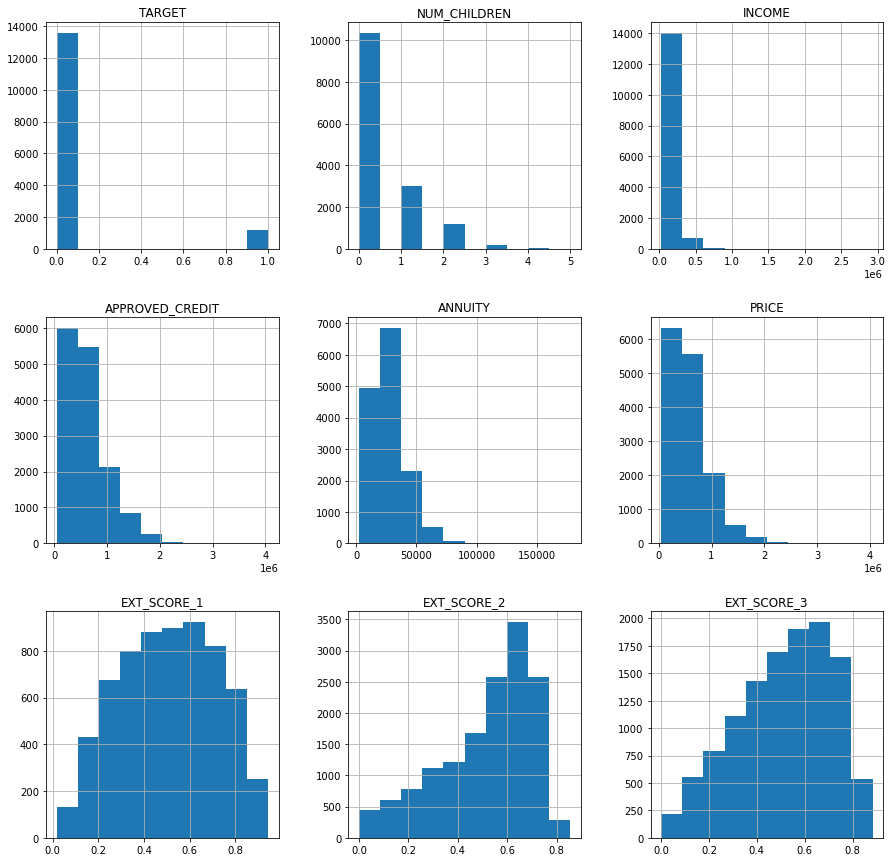

In [11]:
data[numerical].hist(figsize=(15,15))

In [12]:
def descriptive_summary_n(column):
    fig, axs = plt.subplots(1,2, figsize=(19,6))
    axs[0].hist(data[column]) #creating histogram plot
    axs[0].axvline(data[column].mean(), color='red', label=f"Mean: {round(data[column].mean(),2)}") #vertical line for mean of the distribution
    axs[0].axvline(data[column].median(), color='green', label=f"Median: {round(data[column].median(),2)}") #vertical line for median of the distribution
    axs[0].axvline(x=data[column].describe()[4],color='r', linestyle='--', label=f"25th percentile: {data[column].describe()[4]}") #vertical line for 25th percentile of the distribution
    axs[0].axvline(x=data[column].describe()[6],color='r', linestyle='--', label=f"75th percentile: {data[column].describe()[6]}") #vertical line for 75th percentile of the distribution
    axs[0].legend()
    sns.boxplot(data=data, x=column, ax=axs[1]) #creating boxplot
    axs[1].axvline(data[column].mean(), color='red') #vertical line for the mean of the distribution
    fig.suptitle(f"Histogram and Boxplot of {column}")
    plt.show()
    print(f"{data[column].describe().round(3)}\n")
    print(f"Range: {data[column].max() - data[column].min()}")
    print(f"Interquartile Range: {data[column].describe()[6] - data[column].describe()[4]}\n")
    print(f"Skewness: {skew(data[data[column].isna()==False][column], bias=True)}")
    print(f"Kurtosis: {kurtosis(data[data[column].isna()==False][column], bias=True)}")

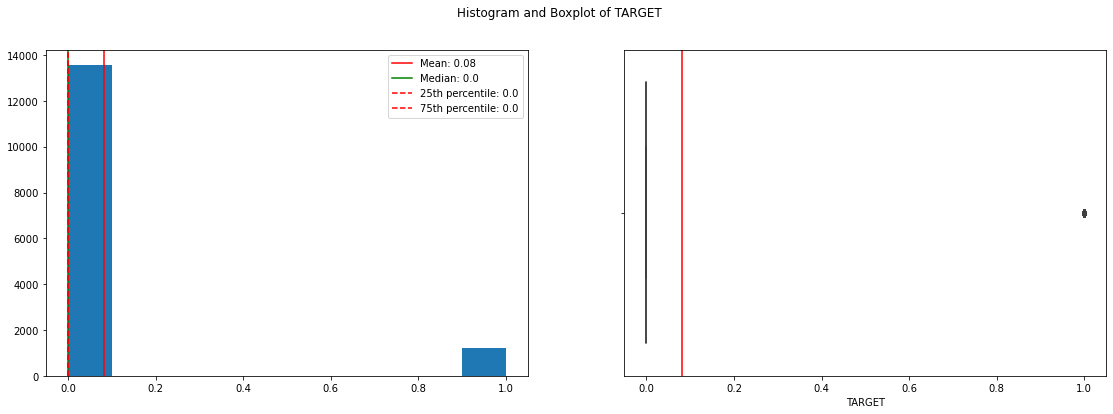

count    14761.000
mean         0.081
std          0.274
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          1.000
Name: TARGET, dtype: float64

Range: 1
Interquartile Range: 0.0

Skewness: 3.059229942265289
Kurtosis: 7.358887839652484


In [13]:
descriptive_summary_n(numerical[0])

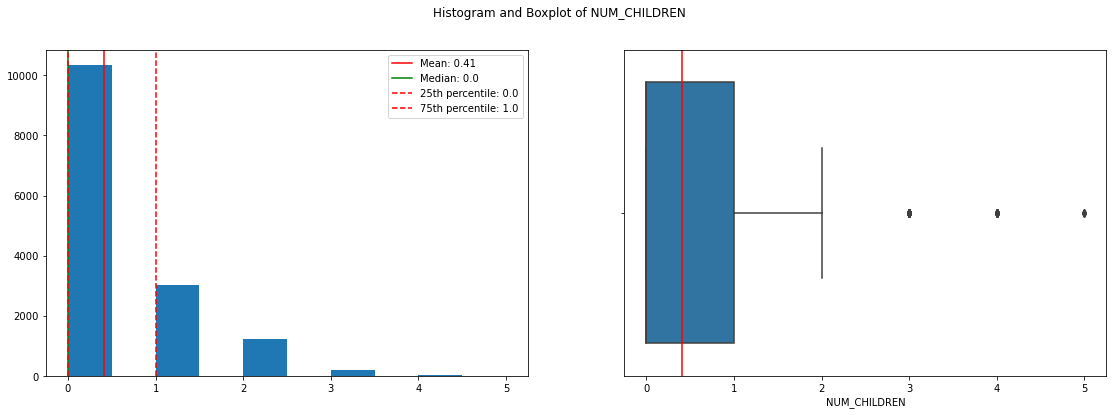

count    14761.000
mean         0.412
std          0.709
min          0.000
25%          0.000
50%          0.000
75%          1.000
max          5.000
Name: NUM_CHILDREN, dtype: float64

Range: 5
Interquartile Range: 1.0

Skewness: 1.7628718073805285
Kurtosis: 2.891233317821687


In [14]:
descriptive_summary_n(numerical[1])

data kebanyakan berdistribusi antara 0 dan 1, data miring ke kanan. skewness digunakan untuk mengukur seberapa miring data. jika skewness = 0 maka data simetris dan tidak miring, jika positif berarti miring kekanan, jika negatif berarti data miring kekiri. untuk variabel jumlah anak ini data miring kekanan. dan untuk kurtosis digunakan untuk mengukur ekor/tail dari data dibandinngkan dengan distribusi normal. jika kurtosis sama dengan 3 berarti sangat dekat dengan distribusi normal, jika besar dari 3 berarti mempunyai ekor yang sangat panjang dan dan mempunyai banyak outlier. std menunjukkan seberapa beragam data, semakin besar nilai std maka semakin beragam data, dan sebaliknya.

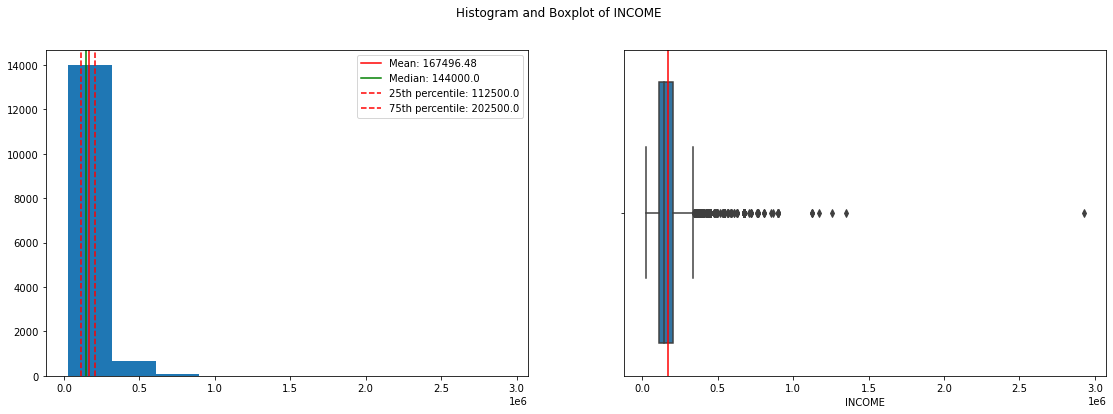

count      14761.000
mean      167496.480
std        95387.655
min        26550.000
25%       112500.000
50%       144000.000
75%       202500.000
max      2930026.500
Name: INCOME, dtype: float64

Range: 2903476.5
Interquartile Range: 90000.0

Skewness: 3.957470635606659
Kurtosis: 59.53675367348839


In [15]:
descriptive_summary_n(numerical[2])

data kebanyakan berdistribusi antara 112500 sampai 202500. data miring ke kanan. mempunyai ekor yang cukup panjang dan memiliki banyak outliers. data cukup beragam

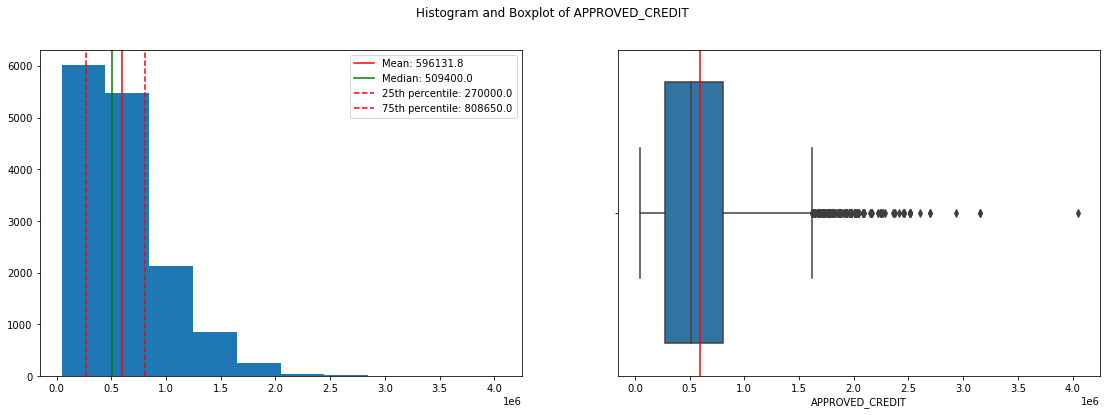

count      14761.000
mean      596131.795
std       399686.134
min        45000.000
25%       270000.000
50%       509400.000
75%       808650.000
max      4050000.000
Name: APPROVED_CREDIT, dtype: float64

Range: 4005000.0
Interquartile Range: 538650.0

Skewness: 1.2752850781914447
Kurtosis: 2.227398637700608


In [16]:
descriptive_summary_n(numerical[3])

data miring kekanan, berdasarkan kurtosis data hampir normal dan memiliki outlier

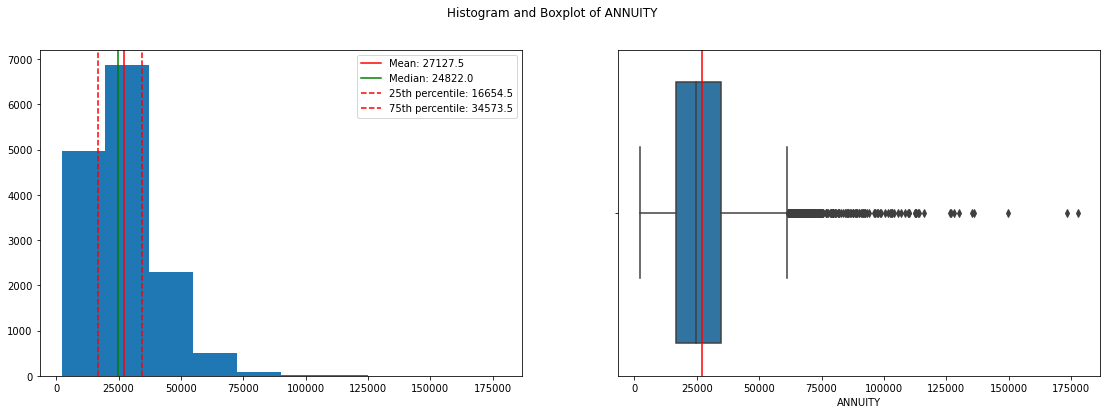

count     14761.000
mean      27127.498
std       14473.651
min        2187.000
25%       16654.500
50%       24822.000
75%       34573.500
max      177826.500
Name: ANNUITY, dtype: float64

Range: 175639.5
Interquartile Range: 17919.0

Skewness: 1.458212355164265
Kurtosis: 5.036828517939362


In [17]:
descriptive_summary_n(numerical[4])

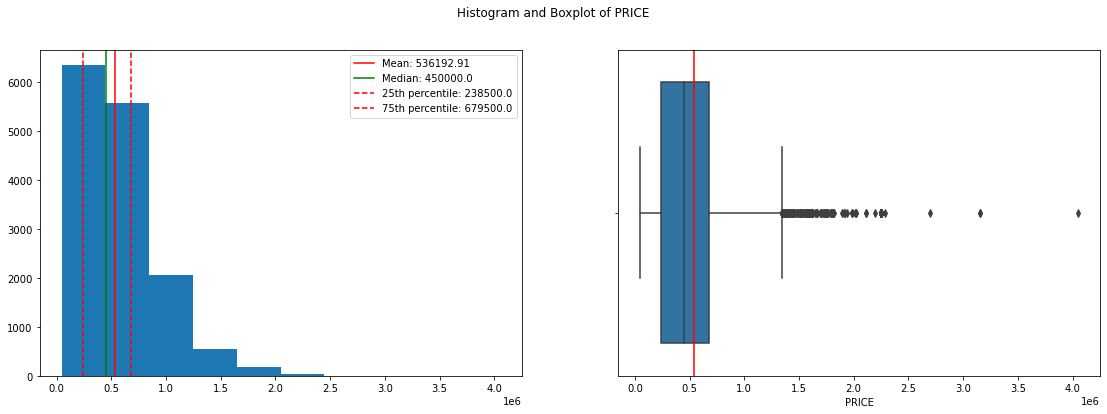

count      14741.000
mean      536192.910
std       366519.352
min        45000.000
25%       238500.000
50%       450000.000
75%       679500.000
max      4050000.000
Name: PRICE, dtype: float64

Range: 4005000.0
Interquartile Range: 441000.0

Skewness: 1.389922213847286
Kurtosis: 2.8049995402917487


In [18]:
descriptive_summary_n(numerical[5])

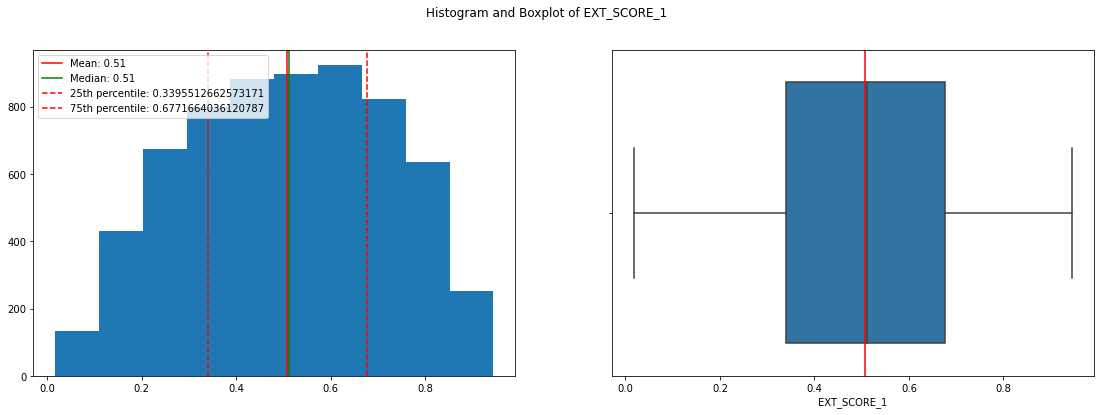

count    6449.000
mean        0.507
std         0.212
min         0.017
25%         0.340
50%         0.511
75%         0.677
max         0.944
Name: EXT_SCORE_1, dtype: float64

Range: 0.9273248848571426
Interquartile Range: 0.3376151373547616

Skewness: -0.08591737970374468
Kurtosis: -0.9396927751709252


In [19]:
descriptive_summary_n(numerical[6])

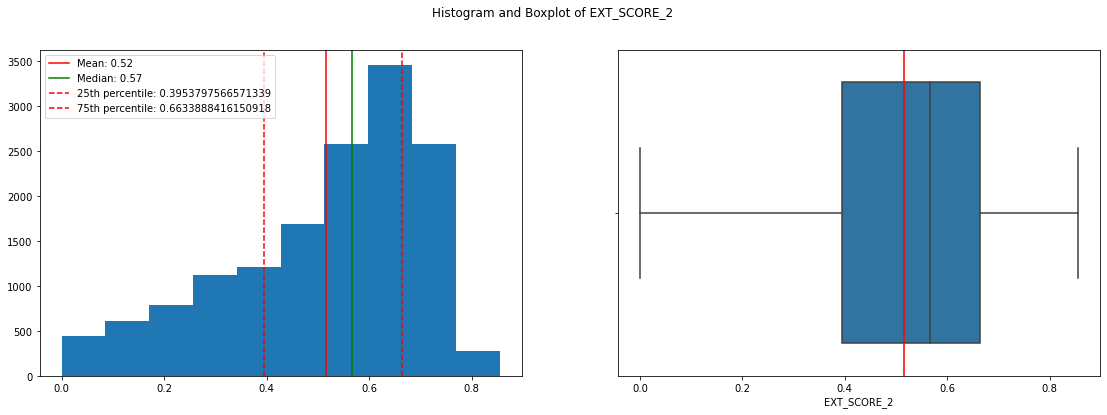

count    14742.000
mean         0.516
std          0.190
min          0.000
25%          0.395
50%          0.566
75%          0.663
max          0.855
Name: EXT_SCORE_2, dtype: float64

Range: 0.8549869432608991
Interquartile Range: 0.26800908495795794

Skewness: -0.8073287555745905
Kurtosis: -0.23355399084914774


In [20]:
descriptive_summary_n(numerical[7])

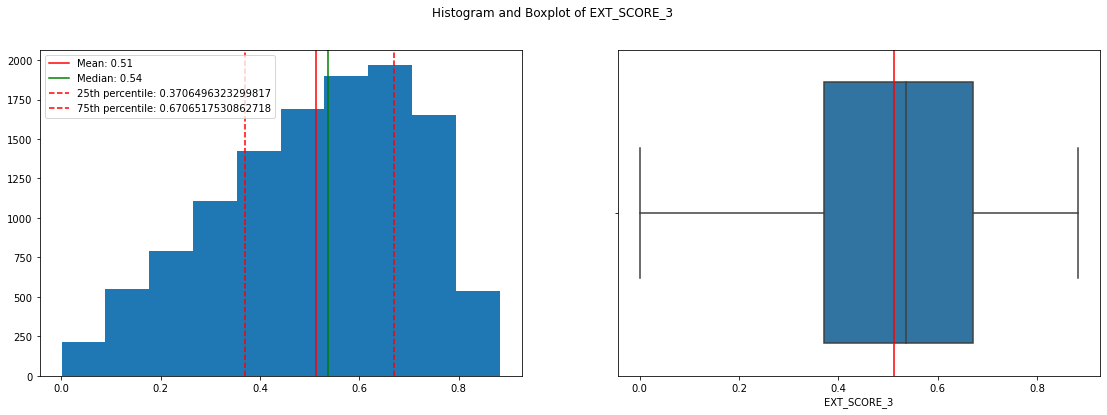

count    11842.000
mean         0.512
std          0.195
min          0.001
25%          0.371
50%          0.537
75%          0.671
max          0.883
Name: EXT_SCORE_3, dtype: float64

Range: 0.8820030475554362
Interquartile Range: 0.30000212075629007

Skewness: -0.41183935528859295
Kurtosis: -0.6679584070504876


In [21]:
descriptive_summary_n(numerical[8])

# Descriptive Summaries of Categorical Data¶

In [22]:
def descriptive_summary_c(column):
    print(f"\033[1mFrequency table of {column} variable: \033[0m")
    freq_table = data[column].value_counts().to_frame().reset_index() #creating frequency table from counts of each category
    freq_table.columns = [column, 'Frequencies']
    freq_table['% Percentages'] = round(freq_table['Frequencies']/data[column].count()*100,2) #adding percentages
    display(freq_table)
    print()
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(data=freq_table, x='Frequencies', y=column, palette='flare', ax=axs[0]) #barplot to display frequencies
    colors = sns.color_palette('flare')
    d = list(freq_table['% Percentages'])
    labels = list(freq_table[column])
    plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%') #pie chart to show percentage distribution of each category
    fig.suptitle(f"Bar Chart and Pie Chart of {column} variable")
    plt.show()

Frequency table of CONTRACT_TYPE variable: 


,CONTRACT_TYPE,Frequencies,% Percentages
0,Cash loans,13281,89.97
1,Revolving loans,1480,10.03


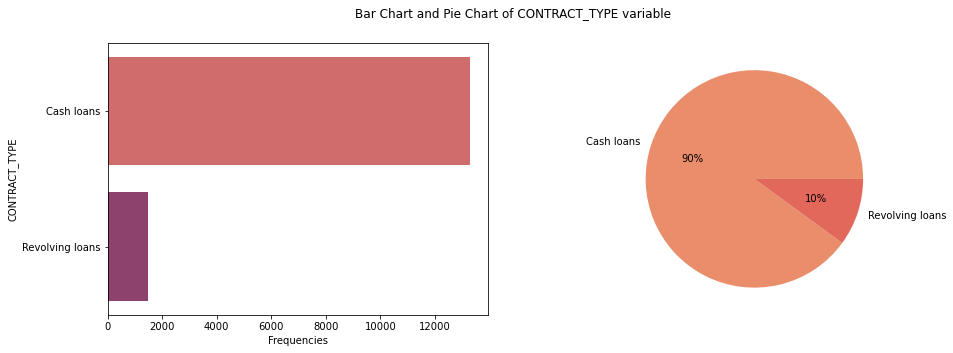

In [23]:
descriptive_summary_c(categorical[0])

Frequency table of GENDER variable: 


,GENDER,Frequencies,% Percentages
0,F,9685,65.61
1,M,5076,34.39


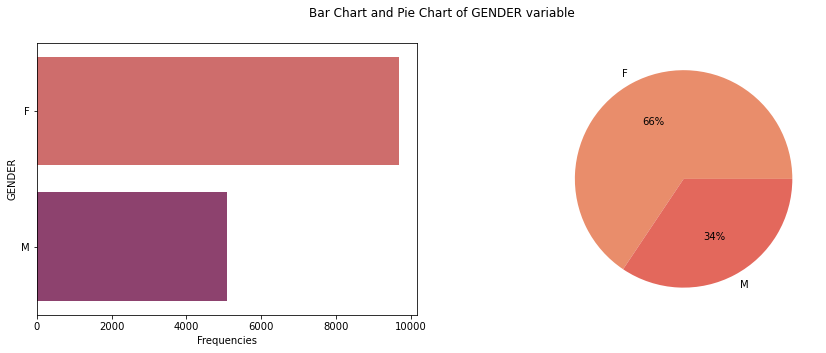

In [24]:
descriptive_summary_c(categorical[1])

Frequency table of INCOME_TYPE variable: 


,INCOME_TYPE,Frequencies,% Percentages
0,Working,7571,51.29
1,Commercial associate,3427,23.22
2,Pensioner,2726,18.47
3,State servant,1036,7.02
4,Unemployed,1,0.01


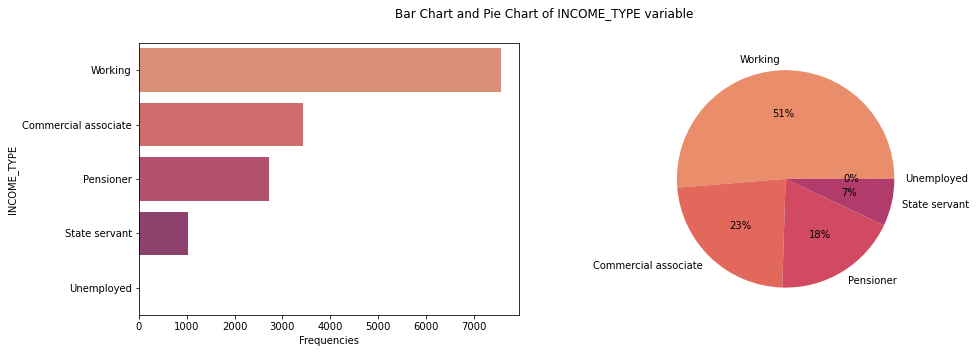

In [25]:
descriptive_summary_c(categorical[2])

Frequency table of EDUCATION variable: 


,EDUCATION,Frequencies,% Percentages
0,Secondary / secondary special,10431,70.67
1,Higher education,3615,24.49
2,Incomplete higher,500,3.39
3,Lower secondary,208,1.41
4,Academic degree,7,0.05


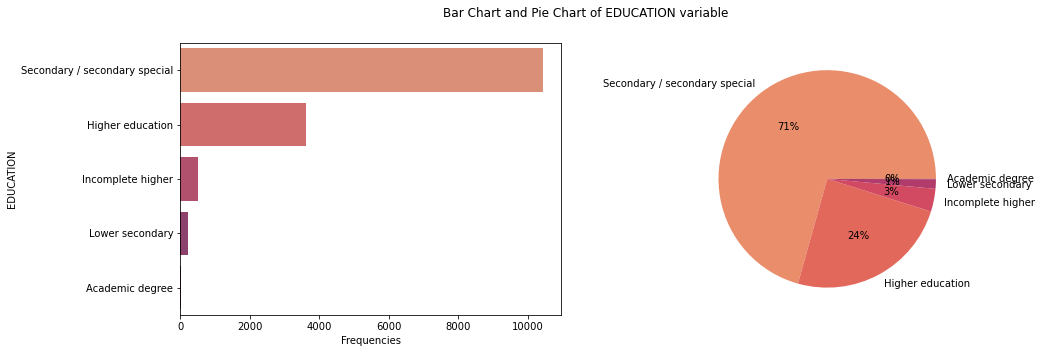

In [26]:
descriptive_summary_c(categorical[3])

Frequency table of FAMILY_STATUS variable: 


,FAMILY_STATUS,Frequencies,% Percentages
0,Married,9539,64.62
1,Single / not married,2084,14.12
2,Civil marriage,1441,9.76
3,Separated,937,6.35
4,Widow,760,5.15


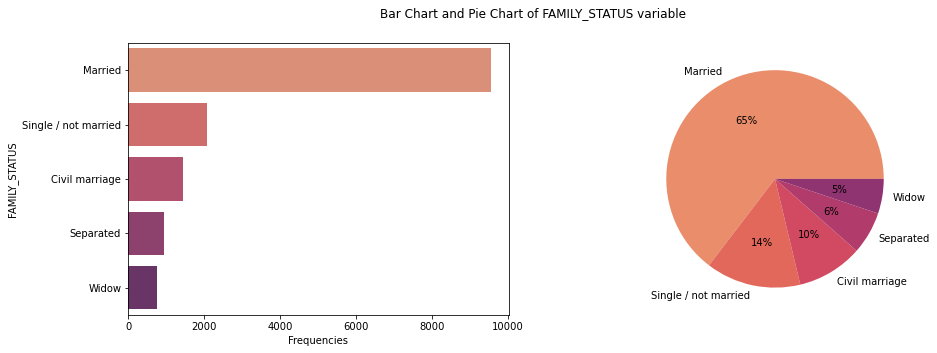

In [27]:
descriptive_summary_c(categorical[4])

Frequency table of HOUSING_TYPE variable: 


,HOUSING_TYPE,Frequencies,% Percentages
0,House / apartment,13135,88.98
1,With parents,697,4.72
2,Municipal apartment,531,3.60
3,Rented apartment,218,1.48
4,Office apartment,128,0.87
5,Co-op apartment,52,0.35


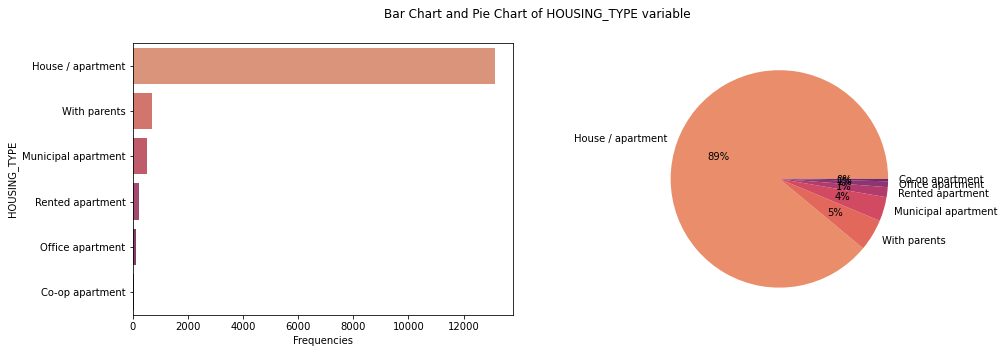

In [28]:
descriptive_summary_c(categorical[5])

# Checking the correlation between features and target

In [30]:
def get_corr(data,col):
    cor = data.corr(method = 'spearman')[col].sort_values(ascending =False)
    print(cor)

In [31]:
get_corr(data,'TARGET')

TARGET             1.000000
ANNUITY            0.014828
NUM_CHILDREN       0.010074
APPROVED_CREDIT   -0.002646
INCOME            -0.015805
PRICE             -0.016329
EXT_SCORE_2       -0.140667
EXT_SCORE_1       -0.145311
EXT_SCORE_3       -0.179712
Name: TARGET, dtype: float64


In [32]:
cor = data.corr()
cor[((cor >= .5) | (cor<= -.5))]

,TARGET,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
TARGET,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NUM_CHILDREN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
APPROVED_CREDIT,NaN,NaN,NaN,1.000000,0.767211,0.987056,NaN,NaN,NaN
ANNUITY,NaN,NaN,NaN,0.767211,1.000000,0.772358,NaN,NaN,NaN
PRICE,NaN,NaN,NaN,0.987056,0.772358,1.000000,NaN,NaN,NaN
EXT_SCORE_1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
EXT_SCORE_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
EXT_SCORE_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# getting independent and dependent variables

In [33]:
data

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,Secondary / secondary special,Married,House / apartment,NaN,0.145475,0.651260
1,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,Higher education,Married,Office apartment,NaN,0.682675,NaN
2,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,0.814700,0.686312,0.758393
3,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,0.399219,0.266520,0.058826
4,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,0,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0.570305,0.399628,0.586740
14757,1,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,Secondary / secondary special,Civil marriage,With parents,NaN,0.610758,0.368969
14758,0,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,Higher education,Separated,House / apartment,NaN,0.639824,0.782608
14759,0,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,0.642139,0.584990


In [38]:
x = data.iloc[ :, 1:15]
y = data['TARGET']

In [39]:
x

,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,Working,Secondary / secondary special,Married,House / apartment,NaN,0.145475,0.651260
1,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,Working,Higher education,Married,Office apartment,NaN,0.682675,NaN
2,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,0.814700,0.686312,0.758393
3,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,0.399219,0.266520,0.058826
4,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,0.368452,0.610483,0.392774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14756,Cash loans,F,1,67500.0,112500.0,7317.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0.570305,0.399628,0.586740
14757,Cash loans,F,1,135000.0,313438.5,21073.5,283500.0,Working,Secondary / secondary special,Civil marriage,With parents,NaN,0.610758,0.368969
14758,Cash loans,F,0,157500.0,1078200.0,31522.5,900000.0,State servant,Higher education,Separated,House / apartment,NaN,0.639824,0.782608
14759,Cash loans,F,0,216000.0,272520.0,21658.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,0.642139,0.584990


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14756    0
14757    1
14758    0
14759    0
14760    0
Name: TARGET, Length: 14761, dtype: int64

In [41]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [43]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# Handling missing values

In [44]:
#checking missing value
data.isnull().sum()

TARGET                0
CONTRACT_TYPE         0
GENDER                0
NUM_CHILDREN          0
INCOME                0
APPROVED_CREDIT       0
ANNUITY               0
PRICE                20
INCOME_TYPE           0
EDUCATION             0
FAMILY_STATUS         0
HOUSING_TYPE          0
EXT_SCORE_1        8312
EXT_SCORE_2          19
EXT_SCORE_3        2919
dtype: int64

In [45]:
data = data.dropna()
data.isnull().sum()

TARGET             0
CONTRACT_TYPE      0
GENDER             0
NUM_CHILDREN       0
INCOME             0
APPROVED_CREDIT    0
ANNUITY            0
PRICE              0
INCOME_TYPE        0
EDUCATION          0
FAMILY_STATUS      0
HOUSING_TYPE       0
EXT_SCORE_1        0
EXT_SCORE_2        0
EXT_SCORE_3        0
dtype: int64

In [46]:
#CEK OUTLIER

<AxesSubplot:xlabel='NUM_CHILDREN'>

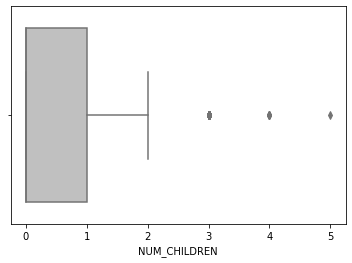

In [47]:
sns.boxplot(data=data, x='NUM_CHILDREN', color = 'silver')

<AxesSubplot:>

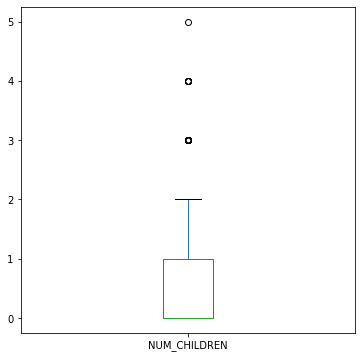

In [47]:
# create a boxplot to know more data shape
data.boxplot(column='NUM_CHILDREN', fontsize=10, rot=0, grid=False, figsize=(6,6))

In [48]:
# calculate IQR to get specific number of outlier
Q1 = data['NUM_CHILDREN'].quantile(0.25)
Q3 = data['NUM_CHILDREN'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 1.0

IQR:
 1.0

Min:
 -1.5

Max:
 2.5


In [49]:
a = Q3 + (1.5 * IQR)

In [50]:
data.NUM_CHILDREN.loc[data["NUM_CHILDREN"]>=a]=np.median(data["NUM_CHILDREN"])

<AxesSubplot:>

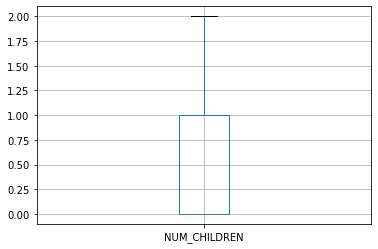

In [155]:
data.boxplot('NUM_CHILDREN')

<AxesSubplot:xlabel='NUM_CHILDREN'>

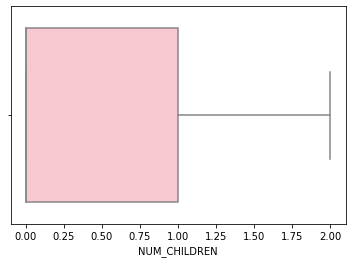

In [51]:
sns.boxplot(data=data, x='NUM_CHILDREN', color = 'pink')

<AxesSubplot:>

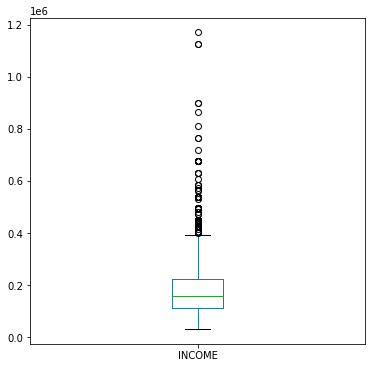

In [156]:
data.boxplot(column='INCOME', fontsize=10, rot=0, grid=False, figsize=(6,6))

<AxesSubplot:xlabel='INCOME'>

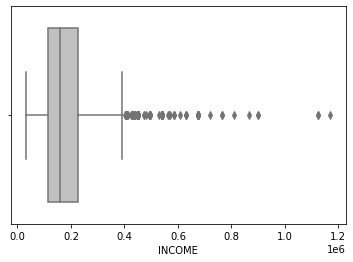

In [52]:
sns.boxplot(data=data, x='INCOME', color = 'silver')

In [56]:
Q1 = data['INCOME'].quantile(0.25)
Q3 = data['INCOME'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 112500.0

Q3:
 202500.0

IQR:
 90000.0

Min:
 -22500.0

Max:
 337500.0


In [57]:
a = Q3 + (1.5 * IQR)
data.INCOME.loc[data["INCOME"]>=a]=np.median(data["INCOME"])

<AxesSubplot:xlabel='INCOME'>

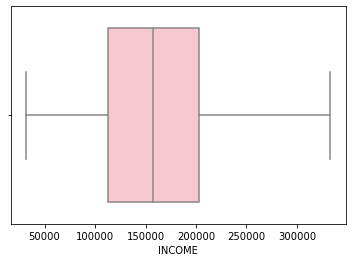

In [58]:
sns.boxplot(data=data, x='INCOME', color = 'pink')

<AxesSubplot:>

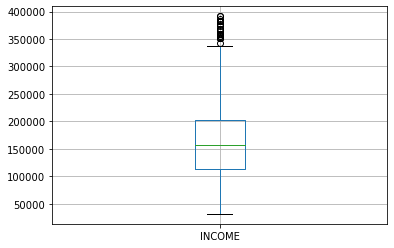

In [159]:
data.boxplot('INCOME')

<AxesSubplot:xlabel='APPROVED_CREDIT'>

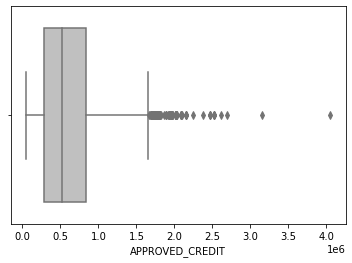

In [59]:
sns.boxplot(data=data, x='APPROVED_CREDIT', color = 'silver')

<AxesSubplot:>

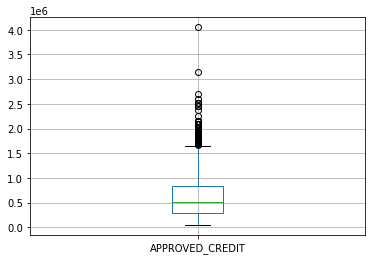

In [160]:
data.boxplot('APPROVED_CREDIT')

In [66]:
Q1 = data['APPROVED_CREDIT'].quantile(0.25)
Q3 = data['APPROVED_CREDIT'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 284400.0

Q3:
 781920.0

IQR:
 497520.0

Min:
 -461880.0

Max:
 1528200.0


In [67]:
a = Q3 + (1.5 * IQR)
data.APPROVED_CREDIT.loc[data["APPROVED_CREDIT"]>=a]=np.median(data["APPROVED_CREDIT"])

<AxesSubplot:xlabel='APPROVED_CREDIT'>

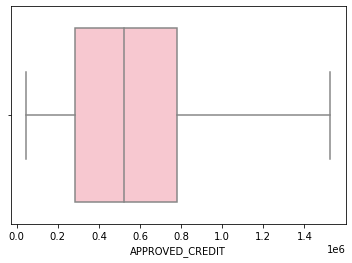

In [68]:
sns.boxplot(data=data, x='APPROVED_CREDIT', color = 'pink')

<AxesSubplot:>

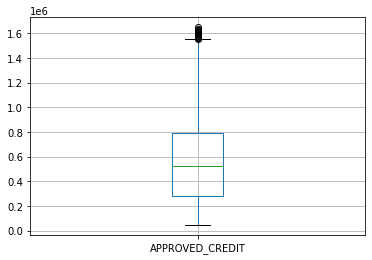

In [163]:
data.boxplot('APPROVED_CREDIT')

<AxesSubplot:xlabel='ANNUITY'>

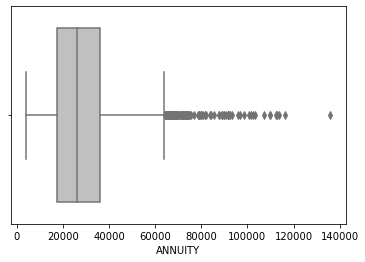

In [69]:
sns.boxplot(data=data, x='ANNUITY', color='silver')

<AxesSubplot:>

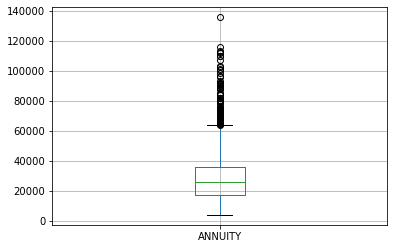

In [164]:
data.boxplot('ANNUITY')

In [82]:
Q1 = data['ANNUITY'].quantile(0.25)
Q3 = data['ANNUITY'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 17167.5

Q3:
 34247.25

IQR:
 17079.75

Min:
 -8452.125

Max:
 59866.875


In [83]:
a = Q3 + (1.5 * IQR)
data.ANNUITY.loc[data["ANNUITY"]>=a]=np.median(data["ANNUITY"])

<AxesSubplot:xlabel='ANNUITY'>

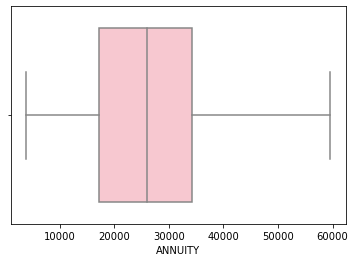

In [84]:
sns.boxplot(data=data, x='ANNUITY', color='pink')

<AxesSubplot:>

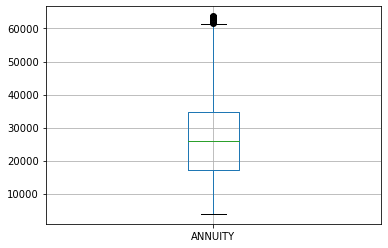

In [169]:
data.boxplot('ANNUITY')

<AxesSubplot:xlabel='PRICE'>

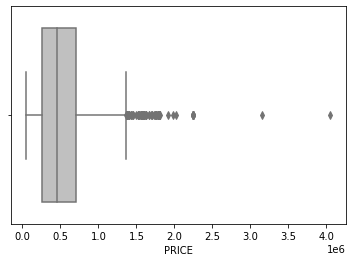

In [85]:
sns.boxplot(data=data, x='PRICE', color='silver')

<AxesSubplot:>

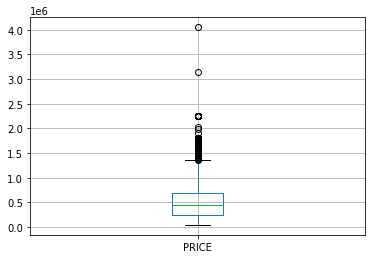

In [170]:
data.boxplot('PRICE')

In [89]:
Q1 = data['PRICE'].quantile(0.25)
Q3 = data['PRICE'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 252000.0

Q3:
 675000.0

IQR:
 423000.0

Min:
 -382500.0

Max:
 1309500.0


In [90]:
a = Q3 + (1.5 * IQR)
data.PRICE.loc[data["PRICE"]>=a]=np.median(data["PRICE"])

<AxesSubplot:xlabel='PRICE'>

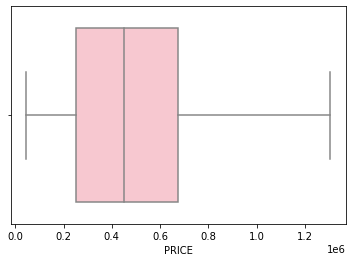

In [91]:
sns.boxplot(data=data, x='PRICE', color='pink')

<AxesSubplot:>

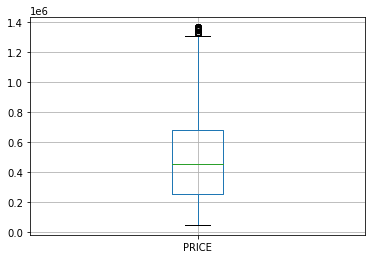

In [173]:
data.boxplot('PRICE')

In [93]:
numerical

['TARGET',
 'NUM_CHILDREN',
 'INCOME',
 'APPROVED_CREDIT',
 'ANNUITY',
 'PRICE',
 'EXT_SCORE_1',
 'EXT_SCORE_2',
 'EXT_SCORE_3']

<AxesSubplot:xlabel='EXT_SCORE_1'>

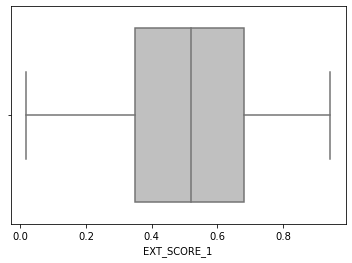

In [94]:
sns.boxplot(data=data, x='EXT_SCORE_1', color='silver')

<AxesSubplot:>

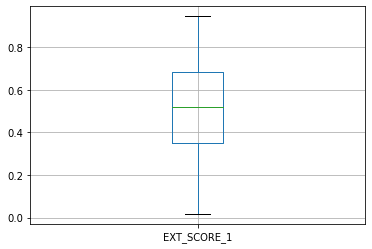

In [192]:
data.boxplot('EXT_SCORE_1')

<AxesSubplot:xlabel='EXT_SCORE_2'>

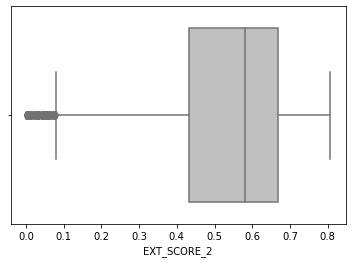

In [95]:
sns.boxplot(data=data, x='EXT_SCORE_2', color='silver')

In [99]:
Q1 = data['EXT_SCORE_2'].quantile(0.25)
Q3 = data['EXT_SCORE_2'].quantile(0.75)

IQR= Q3-Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.4321872652525738

Q3:
 0.667807019538251

IQR:
 0.23561975428567716

Min:
 0.07875763382405804

Max:
 1.0212366509667667


In [100]:
a = Q3 + (1.5 * IQR)
data.EXT_SCORE_2.loc[data["EXT_SCORE_2"]>=a]=np.median(data["EXT_SCORE_2"])

<AxesSubplot:xlabel='EXT_SCORE_2'>

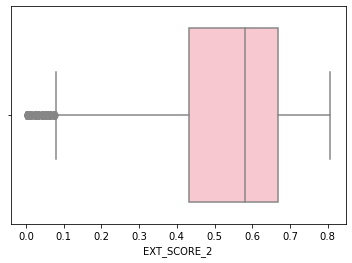

In [101]:
sns.boxplot(data=data, x='EXT_SCORE_2', color='pink')

<AxesSubplot:xlabel='EXT_SCORE_3'>

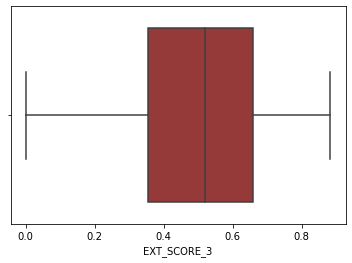

In [102]:
sns.boxplot(data=data, x='EXT_SCORE_3', color='brown')

<AxesSubplot:>

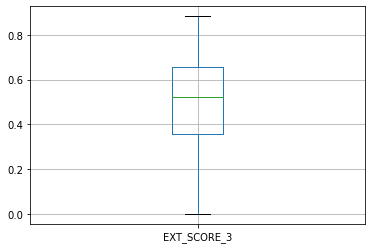

In [103]:
data.boxplot('EXT_SCORE_3')

In [104]:
x = data.iloc[ :, 1:15]
y = data['TARGET']

In [105]:
x

,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
2,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,Working,Secondary / secondary special,Married,House / apartment,0.814700,0.686312,0.758393
3,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,Working,Secondary / secondary special,Married,House / apartment,0.399219,0.266520,0.058826
4,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,Working,Incomplete higher,Married,House / apartment,0.368452,0.610483,0.392774
5,Cash loans,F,0,58500.0,135000.0,7321.5,135000.0,Working,Secondary / secondary special,Single / not married,With parents,0.501097,0.067371,0.199771
8,Cash loans,F,0,112500.0,665892.0,19210.5,477000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.699160,0.673492,0.510090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,Cash loans,M,0,315000.0,225000.0,23755.5,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.184000,0.470237,0.468660
14745,Cash loans,F,0,126000.0,263686.5,28525.5,238500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.504087,0.551037,0.273565
14747,Revolving loans,M,0,157500.0,337500.0,16875.0,337500.0,Working,Higher education,Married,House / apartment,0.887527,0.727850,0.590233
14750,Revolving loans,F,0,45000.0,135000.0,6750.0,135000.0,Working,Higher education,Married,House / apartment,0.770063,0.583092,0.709189


In [106]:
y

2        0
3        0
4        0
5        0
8        0
        ..
14744    0
14745    0
14747    0
14750    0
14756    0
Name: TARGET, Length: 5286, dtype: int64

In [107]:
for column in data.select_dtypes(include='object'):
    print(data[column].value_counts())
    print("................................................")

Cash loans         4742
Revolving loans     544
Name: CONTRACT_TYPE, dtype: int64
................................................
F    3624
M    1662
Name: GENDER, dtype: int64
................................................
Working                 2877
Commercial associate    1430
Pensioner                527
State servant            452
Name: INCOME_TYPE, dtype: int64
................................................
Secondary / secondary special    3384
Higher education                 1648
Incomplete higher                 213
Lower secondary                    38
Academic degree                     3
Name: EDUCATION, dtype: int64
................................................
Married                 3498
Single / not married     750
Civil marriage           514
Separated                361
Widow                    163
Name: FAMILY_STATUS, dtype: int64
................................................
House / apartment      4644
With parents            294
Municipal apartment    

In [109]:
target = 'TARGET'
median_list = []
mean_list = []
log_list = []
      # 'cb_person_cred_hist_length'
random_seed = 42
test_size =0.3 
label_encode =True
#is_train=True
catogerical_columns = [col for col in data.columns if data[col].dtype=="O"]

In [110]:
catogerical_columns

['CONTRACT_TYPE',
 'GENDER',
 'INCOME_TYPE',
 'EDUCATION',
 'FAMILY_STATUS',
 'HOUSING_TYPE']

In [111]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder

In [146]:
number = LabelEncoder()
data['CONTRACT_TYPE']=number.fit_transform(data['CONTRACT_TYPE'].astype('str'))

In [148]:
number = LabelEncoder()
data['GENDER']=number.fit_transform(data['GENDER'].astype('str'))

In [150]:
number = LabelEncoder()
data['INCOME_TYPE']=number.fit_transform(data['INCOME_TYPE'].astype('str'))

In [151]:
number = LabelEncoder()
data['EDUCATION']=number.fit_transform(data['EDUCATION'].astype('str'))

In [152]:
number = LabelEncoder()
data['FAMILY_STATUS']=number.fit_transform(data['FAMILY_STATUS'].astype('str'))

In [153]:
number = LabelEncoder()
data['HOUSING_TYPE']=number.fit_transform(data['HOUSING_TYPE'].astype('str'))

In [154]:
number = LabelEncoder()
data['ORGANIZATION_TYPE']=number.fit_transform(data['ORGANIZATION_TYPE'].astype('str'))

In [112]:
number = LabelEncoder()
data['CONTRACT_TYPE']=number.fit_transform(data['CONTRACT_TYPE'].astype('str'))
data['GENDER']=number.fit_transform(data['GENDER'].astype('str'))
data['INCOME_TYPE']=number.fit_transform(data['INCOME_TYPE'].astype('str'))
data['EDUCATION']=number.fit_transform(data['EDUCATION'].astype('str'))
data['FAMILY_STATUS']=number.fit_transform(data['FAMILY_STATUS'].astype('str'))
data['HOUSING_TYPE']=number.fit_transform(data['HOUSING_TYPE'].astype('str'))

In [113]:
data

,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
2,0,0,0,1,90000.0,247500.0,8887.5,247500.0,3,4,1,1,0.814700,0.686312,0.758393
3,0,0,1,2,112500.0,506889.0,24781.5,418500.0,3,4,1,1,0.399219,0.266520,0.058826
4,0,0,1,0,216000.0,450000.0,21888.0,450000.0,3,2,1,1,0.368452,0.610483,0.392774
5,0,0,0,0,58500.0,135000.0,7321.5,135000.0,3,4,3,5,0.501097,0.067371,0.199771
8,0,0,0,0,112500.0,665892.0,19210.5,477000.0,1,4,1,1,0.699160,0.673492,0.510090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,0,0,1,0,315000.0,225000.0,23755.5,225000.0,0,4,1,1,0.184000,0.470237,0.468660
14745,0,0,0,0,126000.0,263686.5,28525.5,238500.0,0,4,1,1,0.504087,0.551037,0.273565
14747,0,1,1,0,157500.0,337500.0,16875.0,337500.0,3,1,1,1,0.887527,0.727850,0.590233
14750,0,1,0,0,45000.0,135000.0,6750.0,135000.0,3,1,1,1,0.770063,0.583092,0.709189


In [114]:
x = data.iloc[ :, 1:15]
y = data['TARGET']

In [115]:
x

,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,FAMILY_STATUS,HOUSING_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
2,0,0,1,90000.0,247500.0,8887.5,247500.0,3,4,1,1,0.814700,0.686312,0.758393
3,0,1,2,112500.0,506889.0,24781.5,418500.0,3,4,1,1,0.399219,0.266520,0.058826
4,0,1,0,216000.0,450000.0,21888.0,450000.0,3,2,1,1,0.368452,0.610483,0.392774
5,0,0,0,58500.0,135000.0,7321.5,135000.0,3,4,3,5,0.501097,0.067371,0.199771
8,0,0,0,112500.0,665892.0,19210.5,477000.0,1,4,1,1,0.699160,0.673492,0.510090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,0,1,0,315000.0,225000.0,23755.5,225000.0,0,4,1,1,0.184000,0.470237,0.468660
14745,0,0,0,126000.0,263686.5,28525.5,238500.0,0,4,1,1,0.504087,0.551037,0.273565
14747,1,1,0,157500.0,337500.0,16875.0,337500.0,3,1,1,1,0.887527,0.727850,0.590233
14750,1,0,0,45000.0,135000.0,6750.0,135000.0,3,1,1,1,0.770063,0.583092,0.709189


In [116]:
y

2        0
3        0
4        0
5        0
8        0
        ..
14744    0
14745    0
14747    0
14750    0
14756    0
Name: TARGET, Length: 5286, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

In [129]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size =0.1, random_state=0)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [132]:
y_pred = classifier.predict(x_train)

In [133]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
cm_tr = confusion_matrix(y_train, y_pred)
cm_tr

array([[4429,    0],
       [ 328,    0]], dtype=int64)

In [125]:
3941/4228

0.9321192052980133

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [127]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)

print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.21%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.932119    0.0  0.932119     0.466060      0.868846
recall        1.000000    0.0  0.932119     0.500000      0.932119
f1-score      0.964867    0.0  0.932119     0.482434      0.899371
support    3941.000000  287.0  0.932119  4228.000000   4228.000000
_______________________________________________
Confusion Matrix: 
 [[3941    0]
 [ 287    0]]

Test Result:
Accuracy Score: 91.97%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy    macro avg  weighted avg
precision    0.919660   0.0   0.91966     0.459830      0.845774
recall       1.000000   0.0   0.91966     0.500000      0.919660
f1-score     0.958149   0.0   0.91966     0.479074      0.881171
support    973.000000  85.0   0.91966  1058.000000   1058.000000
_____________________________

In [149]:
svm_prob = classifier.predict_proba(x_test)

In [139]:
random_probs=[0 for _ in range(len(y_test))]

In [140]:
svm_probs

array([[0.99123483, 0.00876517],
       [0.92081331, 0.07918669],
       [0.95533568, 0.04466432],
       ...,
       [0.94826379, 0.05173621],
       [0.67598605, 0.32401395],
       [0.95203868, 0.04796132]])

In [141]:
svm_probs = svm_probs[:,1]

In [137]:
#area under ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true= y_train, y_score=y_pred)

0.5

In [142]:
#menghitung AUC
random_auc = roc_auc_score(y_test, random_probs)

In [143]:
#menghitung auc svm classifier
svm_auc = roc_auc_score(y_test, svm_probs)

In [144]:
#menampilkan hasil
print('Random Prediction: AUCROC = %.3f' % (random_auc))
print('SVM: AUCROC = %.3f' %(svm_auc))

Random Prediction: AUCROC = 0.500
SVM: AUCROC = 0.537


In [146]:
#membuat kurva ROC
#menyimpan nilai yang dibutuhkan untuk membuat ROC curve (false positive rate, true positive rate)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import svm
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test,svm_probs)

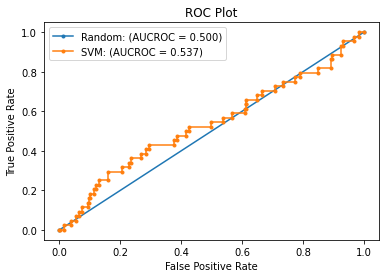

In [147]:
#plot ROC curve dengan matplotlib.pyplot
plt.plot(random_fpr, random_tpr, marker='.', label='Random: (AUCROC = %.3f)' % random_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM: (AUCROC = %.3f)' % svm_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()